In [1]:
import os
from data_tools import npToSpectrogram
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd

# Sample rate chosen to read audio (i.e. 8k Hz)
sample_rate = 8000

# One of the testing examples

In [2]:
FOLDER = "./testing_batch"
list_files = [
    'input_samples/testing1.wav', # noisy input data to be predicted
    'predicted_samples/testing1-output.wav', # predicted cleaned output
]

### Noisy voice

In [3]:
testing1_inp, sr = librosa.load(os.path.join(FOLDER, list_files[0]), sr=sample_rate)
ipd.Audio(testing1_inp, rate=8000)

### Predicted clean voice

In [4]:
testing1_predic, sr = librosa.load(os.path.join(FOLDER, list_files[1]), sr=sample_rate)
ipd.Audio(testing1_predic, rate=8000)

In [30]:
# code to show waveform of the audio noisy input and predicted output
def show_waveform(clipvoicenoise, clipnoise, sample_rate):
    plt.figure(figsize=(20, 12))
    plt.subplots_adjust(hspace=0.35)
    plt.subplot(2, 1, 1)
    plt.title('Audio voice + noise')
    plt.ylabel('Amplitude')
    plt.xlabel('Time(s)')
    librosa.display.waveshow(clipvoicenoise, sr=sample_rate)
    plt.ylim(-0.05, 0.05)
    plt.subplot(2, 1, 2)
    plt.title('Audio predicted voice')
    plt.ylabel('Amplitude')
    plt.xlabel('Time(s)')
    librosa.display.waveshow(clipnoise, sr=sample_rate)
    plt.ylim(-0.05, 0.05)
    return

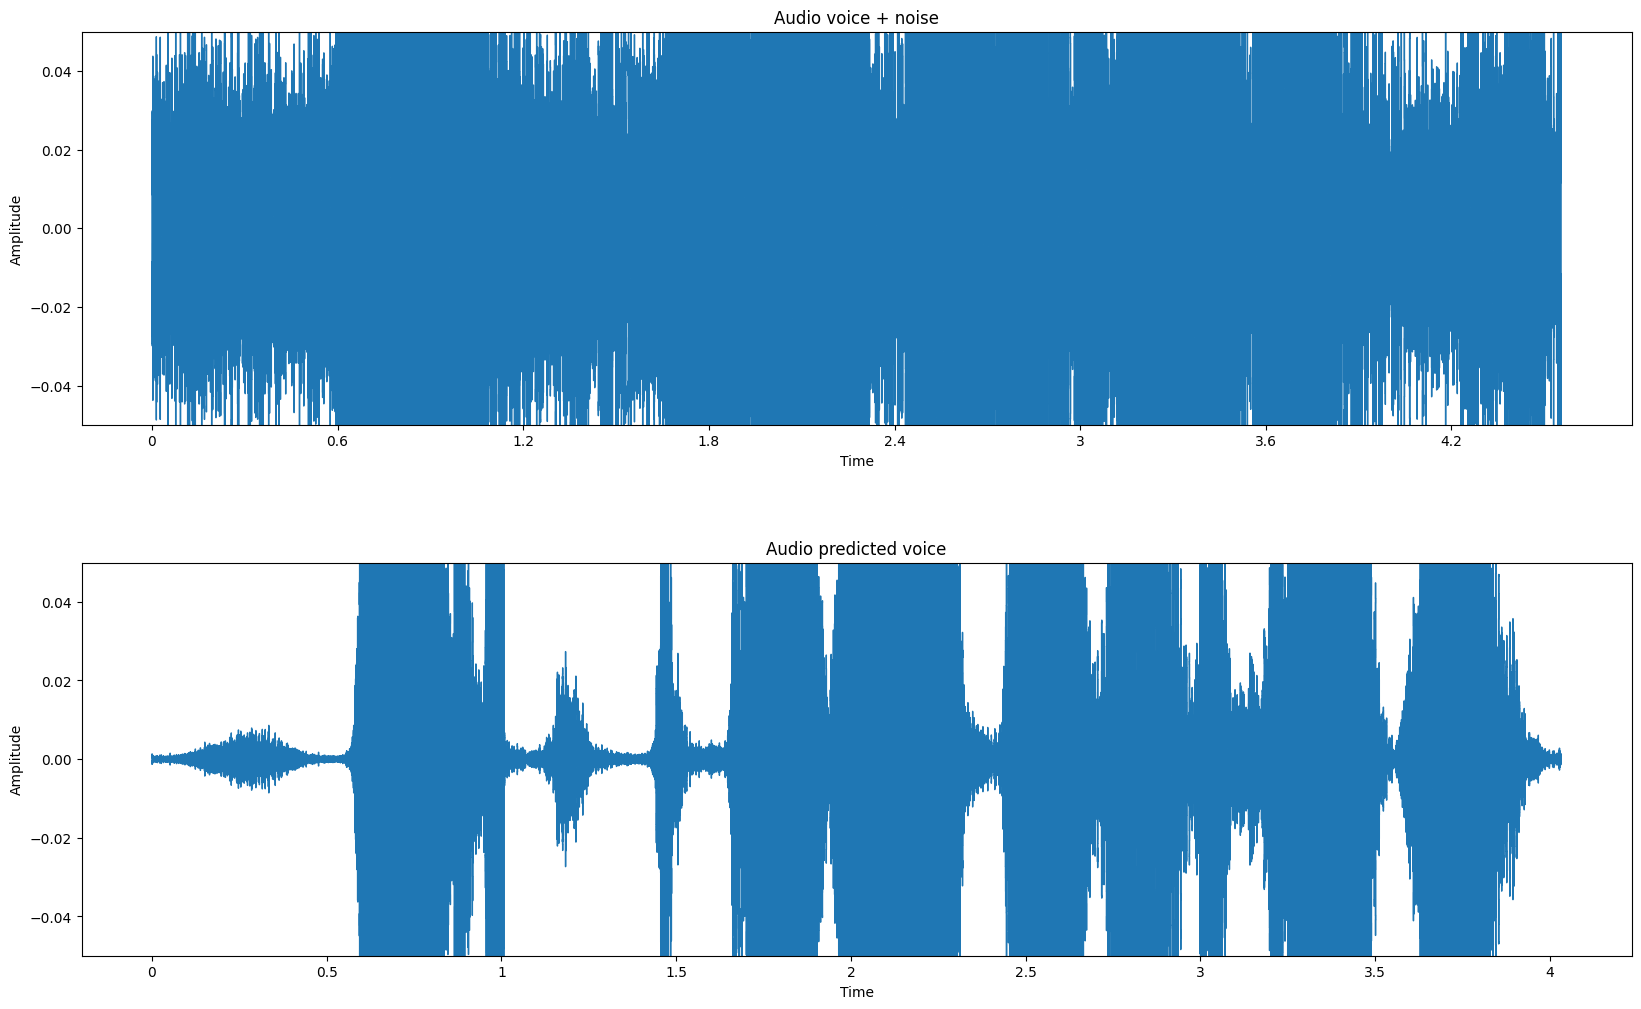

In [33]:
show_waveform(testing1_inp, testing1_predic, sample_rate)

In [5]:
# Minimum duration of audio files to consider
min_duration = 1.0

# Our training data will be frame of slightly above 1 second
frame_length = 8064

# hop length for clean voice files separation (no overlap)
hop_length_frame = 8064

# Choosing n_fft and hop_length_fft to have squared spectrograms
n_fft = 255
hop_length_fft = 63

dim_square_spec = int(n_fft / 2) + 1

In [6]:
def show_spectrogram(noisy_spectrum_magnitude, noise_spectrum_magnitude, sample_rate, hop_length_fft):
    plt.figure(figsize=(8, 12))
    plt.subplot(2, 1, 1)
    plt.title('Spectrogram voice + noise')
    librosa.display.specshow(noisy_spectrum_magnitude, x_axis='time',
                             y_axis='linear', sr=sample_rate, hop_length=hop_length_fft)
    plt.colorbar()
    plt.subplot(2, 1, 2)
    plt.title('Spectrogram predicted voice')
    librosa.display.specshow(noise_spectrum_magnitude, x_axis='time',
                             y_axis='linear', sr=sample_rate, hop_length=hop_length_fft)
    plt.colorbar()
    plt.tight_layout()
    return

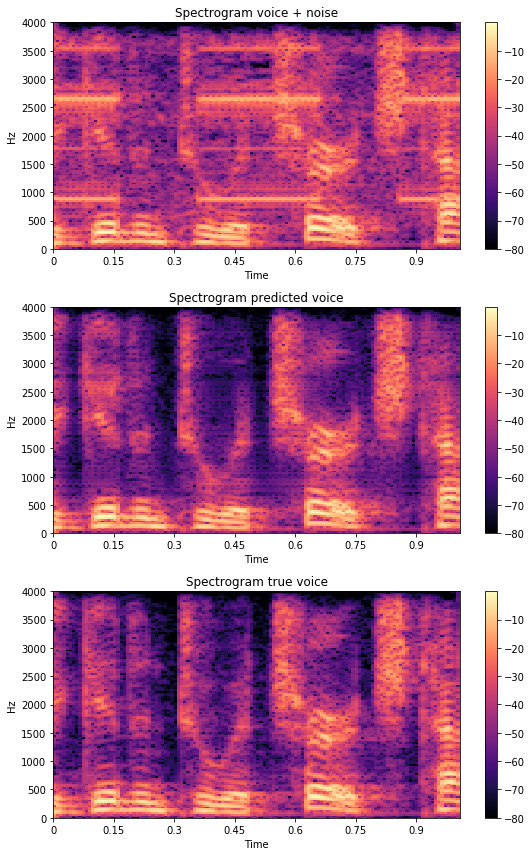

In [21]:
m_amp_db_noisy_voice,  m_pha_noisy_voice =  npToSpectrogram (testing1_inp.reshape(1,8064), dim_square_spec, n_fft, hop_length_fft)

m_amp_db_voice_pred,  m_pha_voice_pred =  npToSpectrogram (testing1_predic.reshape(1,8064), dim_square_spec, n_fft, hop_length_fft)

show_spectrogram(m_amp_db_noisy_voice[0,:,:], m_amp_db_voice_pred[0,:,:], sample_rate, hop_length_fft)